In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [2]:
x_1 = np.random.randint(0,1000,1000)
x_2 = np.random.randint(0,1000,1000)
x_3 = np.random.randint(0,1000,1000)

y = 5*x_1 + 3*x_2 + 1.5*x_3 + 6
y.shape

(1000,)

In [3]:
x=np.transpose((x_1, x_2,x_3))
x.shape

(1000, 3)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)


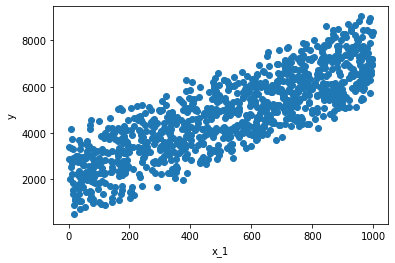

In [5]:
plt.scatter(x[:,:1],y)
plt.xlabel("x_1")
plt.ylabel("y")
plt.show()

In [6]:

x_mean = np.mean(x)
y_mean = np.mean(y)

num = 0
den = 0
for i in range(len(x)):
  num+=(x[i]- x_mean)*(y[i]- y_mean)
  den+=(x[i]- x_mean)**2
m = num/den
c = y_mean - m*x_mean
print("Final weights: ",m)

Final weights:  [5.00392379 2.99624905 1.59642308]


In [7]:
y_pred = X_test.dot(m)
score = r2_score(y_test, y_pred)
error = 1-score
print("score= {} %".format( round(score, 3)))
print("error=", error)

score= 0.999 %
error= 0.0008742535140224827


In [9]:
data2 = pd.read_csv("https://raw.githubusercontent.com/MohandAmr/Machine-Learning/main/4-Linear%20Assignment/USA_Housing.csv")
data2.drop(columns="Address",inplace=True)
data2.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


<AxesSubplot: >

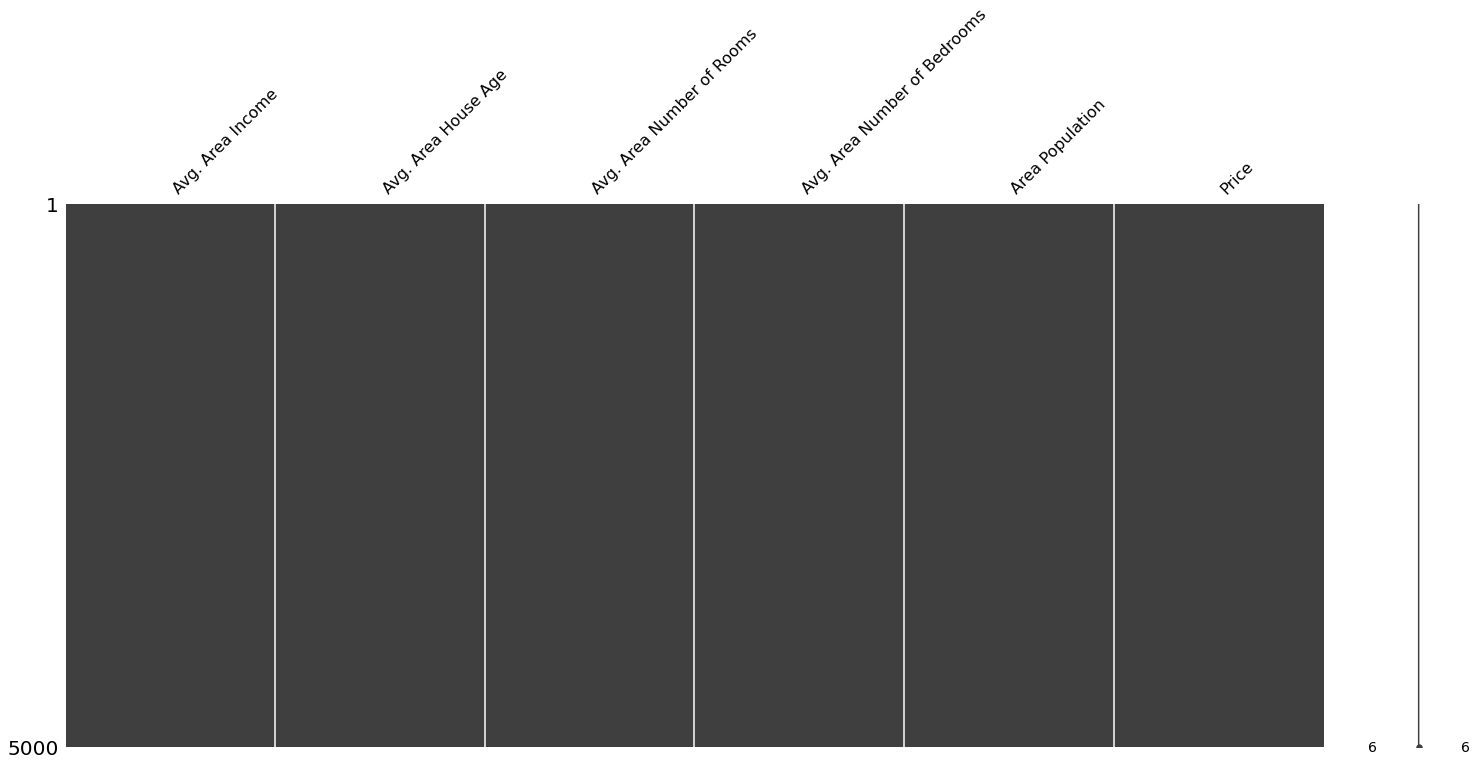

In [10]:
msno.matrix(data2)

In [11]:
data2.describe().T.sort_values(ascending = 0,by = "mean").style.background_gradient(cmap = "jet")

,count,mean,std,min,25%,50%,75%,max
Price,5000.000000,1232072.654145,353117.626584,15938.657920,997577.135075,1232669.378000,1471210.204500,2469065.594000
Avg. Area Income,5000.000000,68583.108984,10657.991214,17796.631190,61480.562390,68804.286405,75783.338665,107701.748400
Area Population,5000.000000,36163.516039,9925.650114,172.610686,29403.928700,36199.406690,42861.290770,69621.713380
Avg. Area Number of Rooms,5000.000000,6.987792,1.005833,3.236194,6.299250,7.002902,7.665871,10.759588
Avg. Area House Age,5000.000000,5.977222,0.991456,2.644304,5.322283,5.970429,6.650808,9.519088
Avg. Area Number of Bedrooms,5000.000000,3.981330,1.234137,2.000000,3.140000,4.050000,4.490000,6.500000


In [21]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))


In [22]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost


In [12]:
data2 = (data2 - data2.mean()) / data2.std()
data2.mean()

Avg. Area Income                1.172396e-17
Avg. Area House Age            -2.476241e-16
Avg. Area Number of Rooms      -5.087486e-16
Avg. Area Number of Bedrooms   -2.110312e-16
Area Population                 4.092726e-16
Price                           2.202682e-16
dtype: float64

In [13]:
data2.insert(0, 'Ones', 1)


In [14]:
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]
print('X2 data = \n' ,X2.head(10) )
print('y2 data = \n' ,y2.head(10) )



X2 data = 
    Ones  Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0     1          1.028557            -0.296897                   0.021272   
1     1          1.000708             0.025899                  -0.255481   
2     1         -0.684561            -0.112292                   1.516092   
3     1         -0.491450             1.221450                  -1.392938   
4     1         -0.806992            -0.944739                   0.846657   
5     1          1.087695            -0.997335                  -0.878157   
6     1         -0.364482             0.048528                   1.153241   
7     1          0.920552             1.021283                  -0.365184   
8     1         -0.812109            -0.620397                  -0.591222   
9     1          1.248154            -1.566938                   1.173053   

   Avg. Area Number of Bedrooms  Area Population  
0                      0.088053        -1.317467  
1                     -0.722229       

In [15]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0,0,0,0]))



In [19]:
alpha = 0.1
iters = 100

In [23]:
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

In [24]:
thiscost = computeCost(X2, y2, g2)


print('g2 = ' , g2)
print('cost2  = ' , cost2[0:50] )
print('computeCost = ' , thiscost)
print('**************************************')


g2 =  [[3.29123395e-16 6.51211657e-01 4.65022892e-01 3.42933597e-01
  6.52998512e-03 4.27290742e-01]]
cost2  =  [0.41241631 0.3420354  0.28532447 0.2395602  0.20257722 0.17265017
 0.14840153 0.12872945 0.11275096 0.09975737 0.08917896 0.08055706
 0.0735219  0.06777501 0.06307516 0.05922716 0.05607292 0.05348424
 0.05135708 0.04960691 0.04816501 0.04697542 0.04599257 0.04517932
 0.04450533 0.04394584 0.0434806  0.04309304 0.0427696  0.04249915
 0.04227255 0.04208231 0.04192225 0.04178729 0.04167325 0.04157667
 0.04149468 0.04142492 0.04136544 0.04131459 0.04127103 0.04123362
 0.04120143 0.04117366 0.04114966 0.04112886 0.04111081 0.04109511
 0.04108143 0.04106949]
computeCost =  0.040980203015631114
**************************************
